In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew

%matplotlib inline

In [3]:
bank_df = pd.read_excel('/Users/yingqinluo/Desktop/Data Scientist/FXCompared/WorldBankDataset_rpw_dataset_2011_2015_q2.xlsx',
                       sheetname='Dataset')

In [4]:
bank_df.head()

,id,period,source_code,source_name,source_region,source_income,source_lending,source_G8G20,destination_code,destination_name,...,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,note1,note2,coverage,pick-up method,date
0,13123,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.770000,3.29,5.29,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
1,13129,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.767737,3.42,5.82,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
2,13128,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.750000,4.38,7.38,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
3,13127,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.791400,2.12,6.12,1.83024,yes,NaN,NaN,Nationwide,Bank Account,24/Jan/2011
4,13135,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.764200,3.61,7.61,1.83024,yes,NaN,NaN,Nationwide,Bank Account,24/Jan/2011


In [41]:
bank_df.describe()

/Users/yingqinluo/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,cc1 lcu amount,cc1 denomination amount,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,cc2 lcu amount,cc2 denomination amount,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx
count,39750.000000,39773.000000,39847.000000,39853.000000,39852.000000,39853.000000,39852.000000,39775.000000,39730.000000,39644.000000,39752.000000,39751.000000,39853.000000
mean,9394.382156,200.000025,1063.705353,373.959745,1.785430,8.652767,23318.896762,500.000075,1194.615528,370.632236,1.785907,5.147292,382.819580
std,46041.976589,0.005014,7867.826622,2104.899846,2.344927,6.588614,114557.836297,0.008684,8182.159794,2087.539747,2.344367,3.579412,2158.719017
min,120.000000,200.000000,0.000000,0.000300,-16.580000,-8.970000,0.000000,500.000000,0.000000,0.000300,-16.580000,-13.420000,0.000310
25%,NaN,NaN,NaN,1.000000,NaN,4.250000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,2.740000,NaN,6.910000,NaN,NaN,NaN,NaN,NaN,NaN,2.826500
75%,NaN,NaN,NaN,43.360000,NaN,11.180000,NaN,NaN,NaN,NaN,NaN,NaN,44.330000
max,324500.000000,201.000000,146025.000000,28662.686000,36.050000,75.000000,811000.000000,501.000000,145980.000000,28662.686000,36.050000,42.650000,29667.100000


In [42]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39853 entries, 13123 to 49679
Data columns (total 40 columns):
period                     39853 non-null object
source_code                39853 non-null object
source_name                39853 non-null object
source_region              39853 non-null object
source_income              39853 non-null object
source_lending             39853 non-null object
source_G8G20               39853 non-null object
destination_code           39853 non-null object
destination_name           39853 non-null object
destination_region         39853 non-null object
destination_income         39853 non-null object
destination_lending        39853 non-null object
destination_G8G20          39853 non-null object
firm                       39853 non-null object
firm_type                  39853 non-null object
product                    39639 non-null object
sending location           39853 non-null object
speed actual               39843 non-null object
cc1 l

In [37]:
bank_df.columns

Index([                 u'period',             u'source_code',
                   u'source_name',           u'source_region',
                 u'source_income',          u'source_lending',
                  u'source_G8G20',        u'destination_code',
              u'destination_name',      u'destination_region',
            u'destination_income',     u'destination_lending',
             u'destination_G8G20',                    u'firm',
                     u'firm_type',                 u'product',
              u'sending location',            u'speed actual',
                u'cc1 lcu amount', u'cc1 denomination amount',
                  u'cc1 lcu code',             u'cc1 lcu fee',
               u'cc1 lcu fx rate',           u'cc1 fx margin',
              u'cc1 total cost %',          u'cc2 lcu amount',
       u'cc2 denomination amount',            u'cc2 lcu code',
                   u'cc2 lcu fee',         u'cc2 lcu fx rate',
                 u'cc2 fx margin',        u'cc2 total c

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128f14ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cf22a10>]], dtype=object)

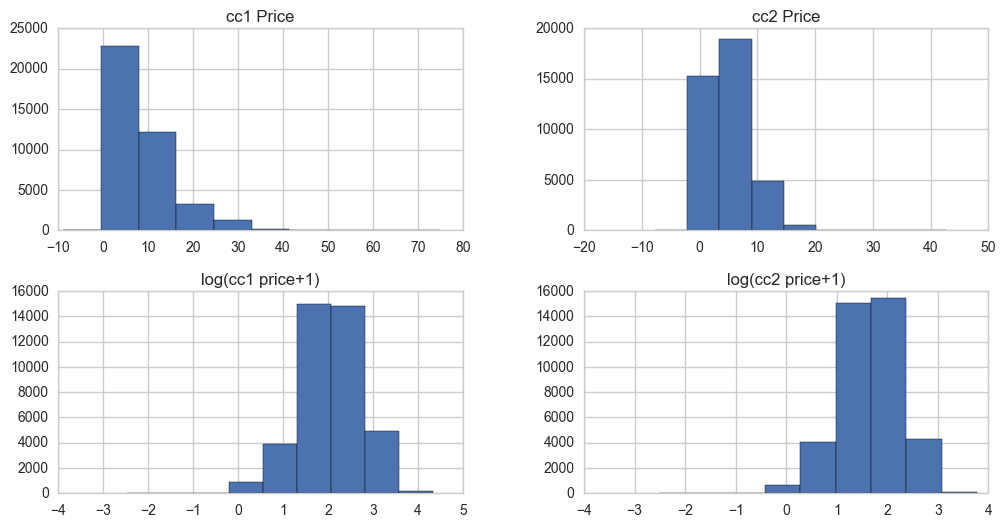

In [216]:
# log transform to make the target more normal
matplotlib.rcParams['figure.figsize'] = (12, 6)
prices = pd.DataFrame({'cc1 Price': bank_df['cc1 total cost %'], 
                      'log(cc1 price+1)': np.log1p(bank_df['cc1 total cost %']),
                      'cc2 Price': bank_df['cc2 total cost %'], 
                      'log(cc2 price+1)': np.log1p(bank_df['cc2 total cost %'])})
prices.hist()

In [48]:
# log transform the target:

bank_df['cc1 total cost %'] = np.log1p(bank_df['cc1 total cost %'])
bank_df['cc2 total cost %'] = np.log1p(bank_df['cc2 total cost %'])

In [53]:
# log transform skewed numeric feature
numeric_feats = bank_df.dtypes[bank_df.dtypes != object].index
skewed_feats = bank_df[numeric_feats].apply(lambda x: skew(x.dropna()))  # compute skewness
skewed_feats = skewed_feats[skewed_feats > .75]
skewed_feats = skewed_feats.index
skewed_feats

Index([u'cc1 lcu amount', u'cc1 denomination amount', u'cc1 lcu fee',
       u'cc1 lcu fx rate', u'cc1 fx margin', u'cc2 lcu amount',
       u'cc2 denomination amount', u'cc2 lcu fee', u'cc2 lcu fx rate',
       u'cc2 fx margin', u'inter lcu bank fx'],
      dtype='object')

In [54]:
bank_df[skewed_feats] = np.log1p(bank_df[skewed_feats])

In [67]:
# count missing percentage for each feature
missing_feats = bank_df.columns[bank_df.isnull().any()].tolist()
bank_df[missing_feats].isnull().sum()/bank_df[missing_feats].isnull().count()

product                    0.005370
speed actual               0.000251
cc1 lcu amount             0.002584
cc1 denomination amount    0.002007
cc1 lcu fee                0.000151
cc1 fx margin              0.010639
cc1 total cost %           0.001405
cc2 lcu amount             0.000025
cc2 denomination amount    0.001957
cc2 lcu code               0.000100
cc2 lcu fee                0.003086
cc2 lcu fx rate            0.005244
cc2 fx margin              0.013274
cc2 total cost %           0.005320
note1                      0.639726
note2                      0.899129
coverage                   0.000502
pick-up method             0.235566
dtype: float64

In [68]:
# drop two features with large amount of missing values
bank_df = bank_df.drop(['note1', 'note2'], axis=1)

In [ ]:
destination_region

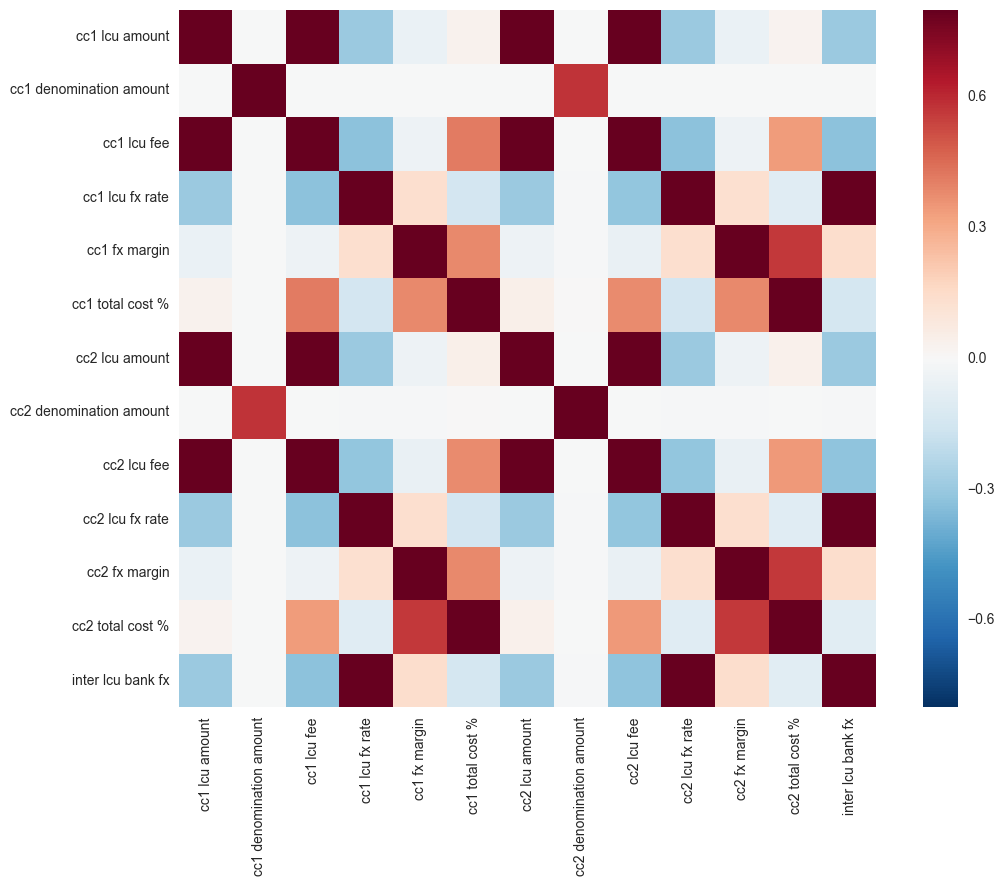

In [69]:
corrmat = bank_df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [88]:
bank_df['destination_region'].value_counts()

East Asia & Pacific           11332
Sub-Saharan Africa             7064
Latin America & Caribbean      6591
South Asia                     5807
Europe & Central Asia          5028
Middle East & North Africa     2732
..                             1299
Name: destination_region, dtype: int64

In [80]:
bank_df['sending location'].value_counts()

Not available                    16559
at Branch                        11990
On-line                           4880
at Branch,Call Center             4690
at Branch,Call Center,On-line     1049
at Branch,On-line                  359
Call Center,On-line                181
Call Center                        145
Name: sending location, dtype: int64

1.	Trends in remittance prices  across time, corridors (i.e. sending-receiving corridor e.g. US->India, UK->Poland) and sending channel. 

    a.	Are any notable changes significant?


In [4]:
bank_df.shape

(39853, 40)

In [5]:
bank_df = bank_df.set_index('id')

In [6]:
periods_cost = bank_df[['cc1 total cost %', 'cc2 total cost %']].groupby(bank_df['period'])

In [7]:
prices = periods_cost.mean()
prices

,cc1 total cost %,cc2 total cost %
period,,
2011_1Q,8.860619,5.190308
2011_3Q,9.342511,5.539493
2012_1Q,9.253537,5.506185
2012_3Q,9.110261,5.342092
2013_1Q,9.129846,5.419321
2013_2Q,8.954652,5.251989
2013_3Q,8.992492,5.365305
2013_4Q,8.727087,5.248540
2014_1Q,8.589608,5.091424


In [8]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2011_1Q to 2015_2Q
Data columns (total 2 columns):
cc1 total cost %    14 non-null float64
cc2 total cost %    14 non-null float64
dtypes: float64(2)
memory usage: 336.0+ bytes


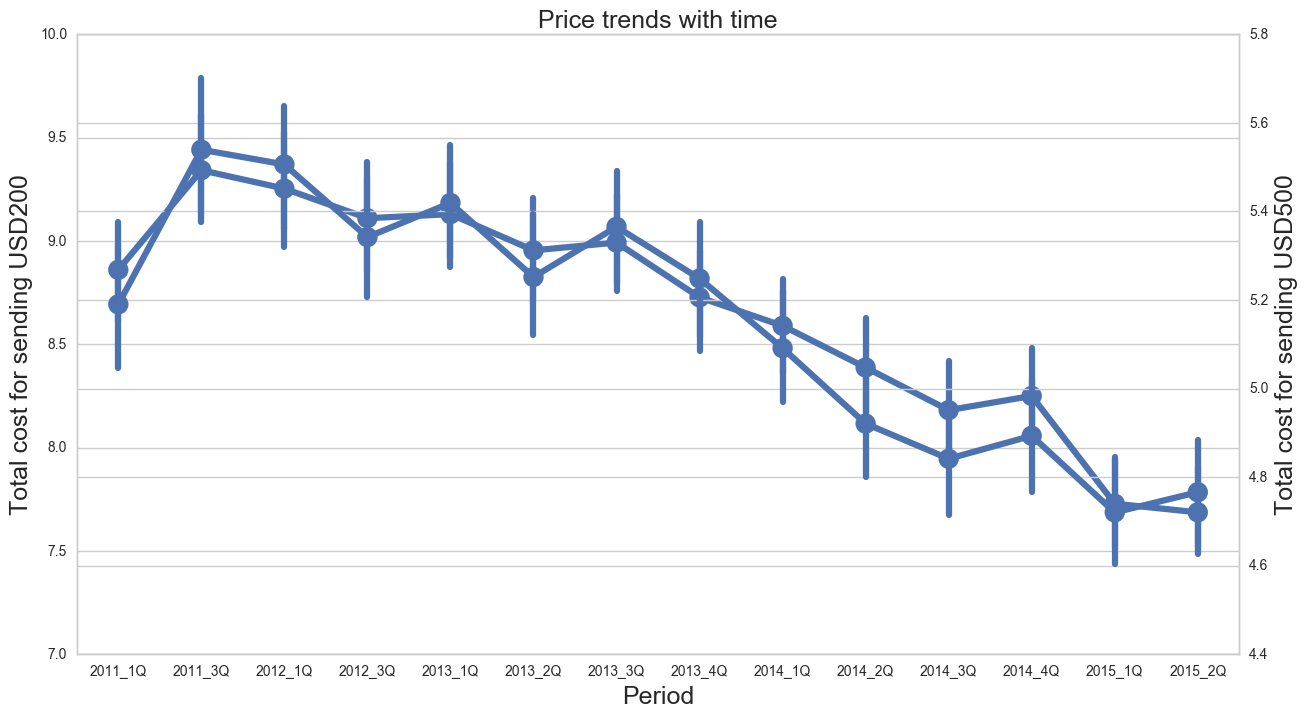

In [217]:
fig, ax = plt.subplots(figsize=(15,8))
sns.pointplot(x="period", y="cc1 total cost %", data=bank_df, ax=ax)
plt.xlabel('Period', fontsize=18)
plt.ylabel('Total cost for sending USD200', fontsize=18)
ax2 = ax.twinx()
sns.pointplot(x="period", y="cc2 total cost %", data=bank_df, ax=ax2)
#plt.xlabel('Period', fontsize=18)
plt.ylabel('Total cost for sending USD500', fontsize=18)

plt.title('Price trends with time', fontsize=18)
sns.plt.show()



In [118]:
#meltCov = pd.melt(bank_df,id_vars=['period'], var_name=['prices'])
#meltCov.head()

In [ ]:
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
g = sns.pointplot(meltCov, col='period', hue='prices')
g.set_xticklabels(rotation=45)

#fig.savefig(s.split('.')[0])
plt.show()

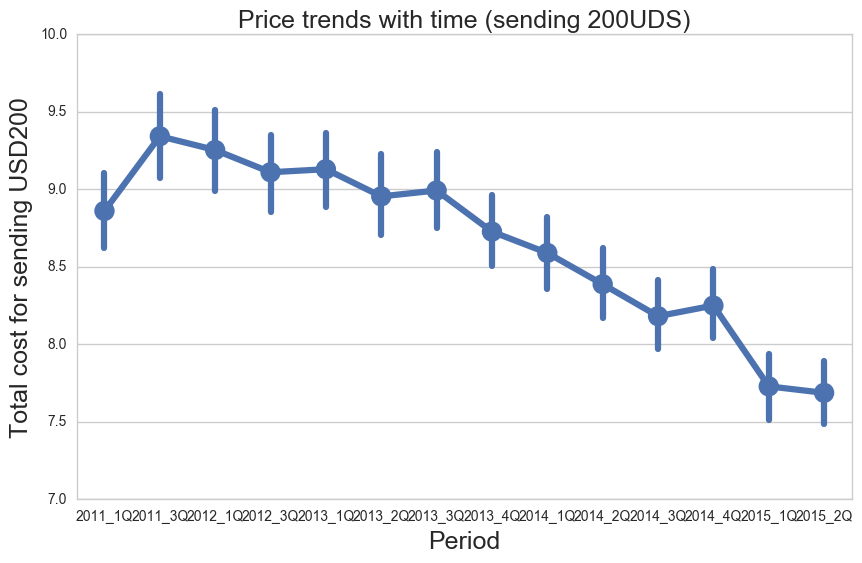

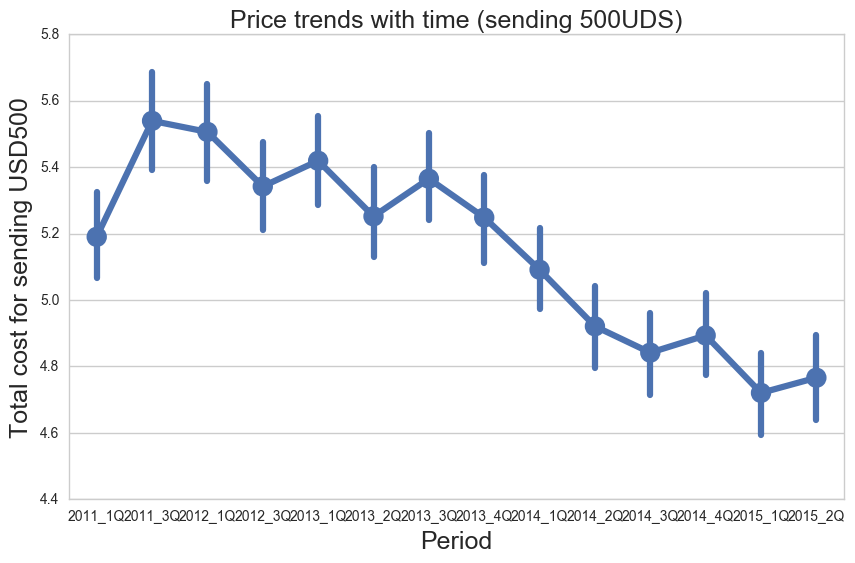

In [219]:
plt.figure(1, figsize=(10, 6))
sns.set_style("whitegrid")
sns.pointplot(x="period", y="cc1 total cost %", data=bank_df)

plt.xlabel('Period', fontsize=18)
plt.ylabel('Total cost for sending USD200', fontsize=18)
#plt.ylim(0,10)
plt.title('Price trends with time (sending 200UDS)', fontsize=18)
plt.figure(2, figsize=(10, 6))
sns.set_style("whitegrid")
sns.pointplot(x="period", y="cc2 total cost %", data=bank_df)

plt.xlabel('Period', fontsize=18)
plt.ylabel('Total cost for sending USD500', fontsize=18)
#plt.ylim(0,10)
plt.title('Price trends with time (sending 500UDS)', fontsize=18)
plt.show()
plt.savefig('/Users/yingqinluo/Desktop/Data Scientist/FXCompared/price_trends with time.jpg')

In [ ]:
# plot two figures together
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.pointplot(x="corridor", y="cc1 total cost %", data=bank_df)
ax2 = sns.pointplot(x="corridor", y="cc2 total cost %", data=bank_df)

In [119]:
bank_df['corridor'] = bank_df['source_name'] + ' -> ' + bank_df['destination_name']

In [120]:
bank_df.tail()

,period,source_code,source_name,source_region,source_income,source_lending,source_G8G20,destination_code,destination_name,destination_region,...,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,coverage,pick-up method,date,corridor
id,,,,,,,,,,,,,,,,,,,,,
49672,2015_2Q,USA,United States,..,High income: OECD,..,G8/G20,VNM,Vietnam,East Asia & Pacific,...,3.465736,3.102791,0.908259,2.161022,3.117065,yes,Nationwide,Cash,27/Apr/2015,United States -> Vietnam
49678,2015_2Q,USA,United States,..,High income: OECD,..,G8/G20,YEM,"Yemen, Rep.",Middle East & North Africa,...,2.397895,0.693147,0.000000,1.098612,0.693147,yes,Nationwide,Cash,27/Apr/2015,"United States -> Yemen, Rep."
49677,2015_2Q,USA,United States,..,High income: OECD,..,G8/G20,YEM,"Yemen, Rep.",Middle East & North Africa,...,2.442347,5.373842,0.076961,1.156881,5.374676,yes,Nationwide,Cash,27/Apr/2015,"United States -> Yemen, Rep."
49680,2015_2Q,USA,United States,..,High income: OECD,..,G8/G20,YEM,"Yemen, Rep.",Middle East & North Africa,...,2.772589,5.364807,0.688135,1.607436,5.374676,yes,Nationwide,Cash,27/Apr/2015,"United States -> Yemen, Rep."
49679,2015_2Q,USA,United States,..,High income: OECD,..,G8/G20,YEM,"Yemen, Rep.",Middle East & North Africa,...,3.465736,5.364807,0.688135,2.102914,5.374676,yes,Nationwide,Cash,27/Apr/2015,"United States -> Yemen, Rep."


In [123]:
bank_df['source_region'].unique()

array([u'..', u'Latin America & Caribbean', u'Sub-Saharan Africa',
       u'East Asia & Pacific'], dtype=object)

In [36]:
bank_df['corridor'].unique()

array([u'Australia -> Fiji', u'Australia -> Kiribati',
       u'Australia -> Pakistan', u'Australia -> Papua New Guinea',
       u'Australia -> Samoa', u'Australia -> Solomon Islands',
       u'Australia -> Tonga', u'Australia -> Tuvalu',
       u'Australia -> Vanuatu', u'Australia -> Vietnam',
       u'Belgium -> Congo, Rep.', u'Belgium -> Morocco',
       u'Belgium -> Turkey', u'Brazil -> Bolivia', u'Brazil -> Paraguay',
       u'Brazil -> Peru', u'Canada -> Haiti', u'Canada -> India',
       u'Canada -> Jamaica', u'Canada -> Philippines', u'Canada -> Rwanda',
       u'Canada -> Vietnam', u'Chile -> Peru', u'Costa Rica -> Nicaragua',
       u'Czech Republic -> Ukraine', u'Czech Republic -> Vietnam',
       u'Dominican Republic -> Haiti', u'France -> Algeria',
       u'France -> China', u"France -> C\xf4te d'Ivoire",
       u'France -> Haiti', u'France -> India', u'France -> Mali',
       u'France -> Morocco', u'France -> Senegal', u'France -> Tunisia',
       u'France -> Vietnam', u'

In [260]:
bank_df['source_region'].value_counts()

..                           36663
Sub-Saharan Africa            1949
Latin America & Caribbean      631
East Asia & Pacific            610
Name: source_region, dtype: int64

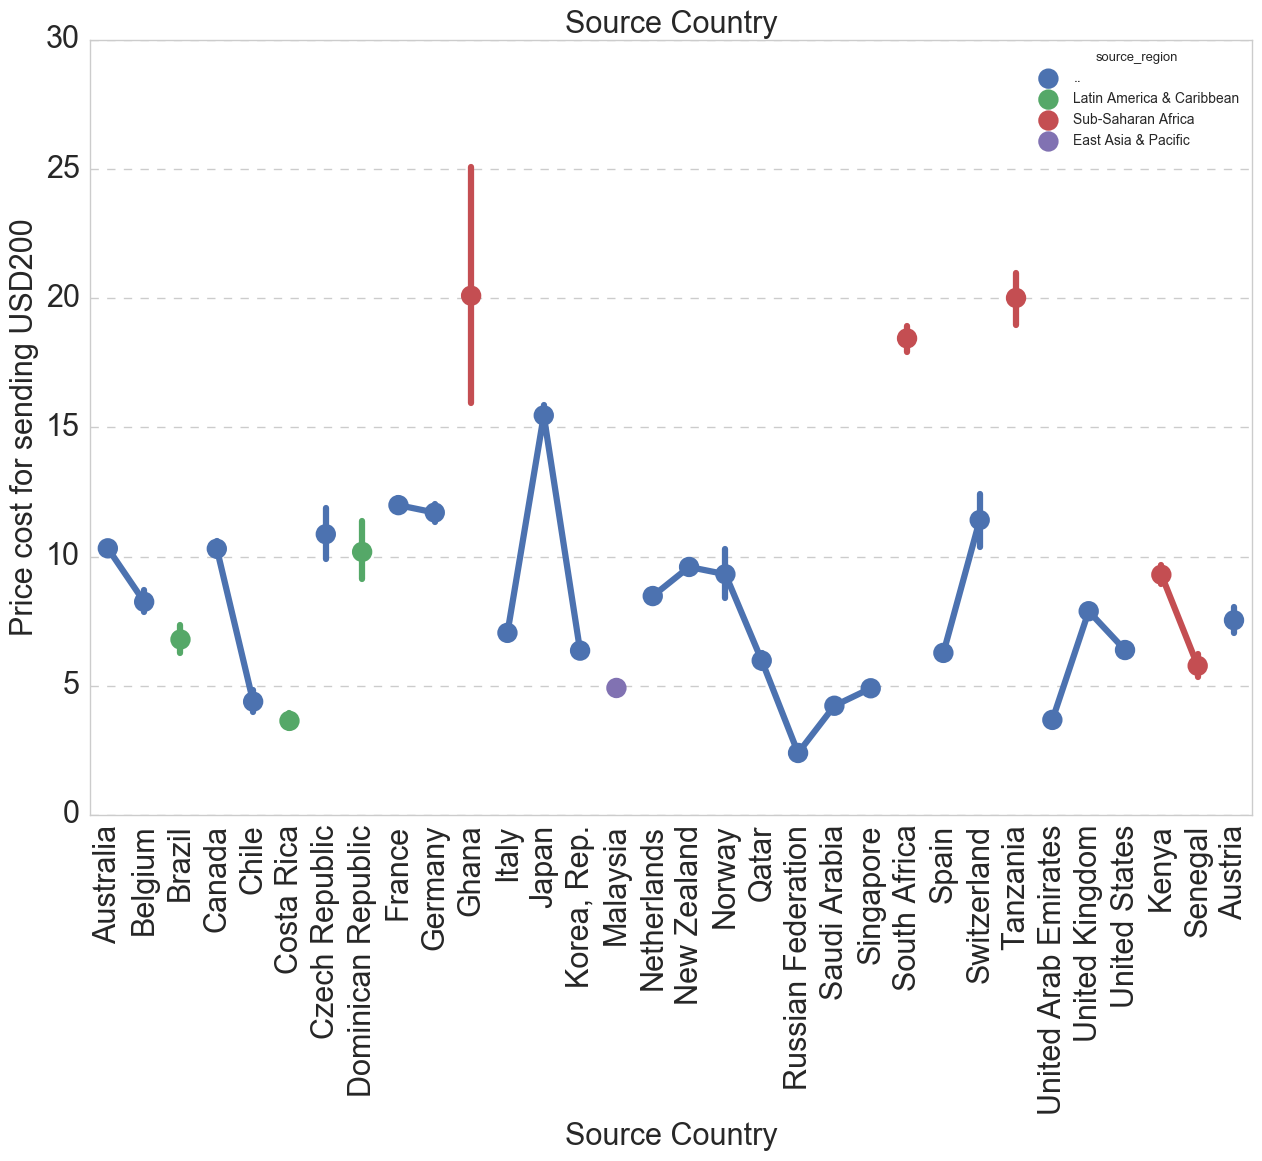

In [275]:
fig = plt.figure(figsize=(15, 10))
sns.set_style("whitegrid", {
    'grid.linestyle': '--'
 })

ax1 = sns.pointplot(x="source_name", y="cc1 total cost %", hue = 'source_region', data=bank_df)
#ax1 = sns.pointplot(x="source_name", y="cc1 total cost %", hue='speed actual', data=bank_df)
#locs, labels = plt.xticks()
plt.xticks(rotation = 90, fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Source Country', fontsize=22)
plt.ylabel('Price cost for sending USD200', fontsize=22)
plt.title('Source Country', fontsize=22)
#fig.savefig('/Users/yingqinluo/Desktop/Data Scientist/FXCompared/price_trends with corridor.jpg')

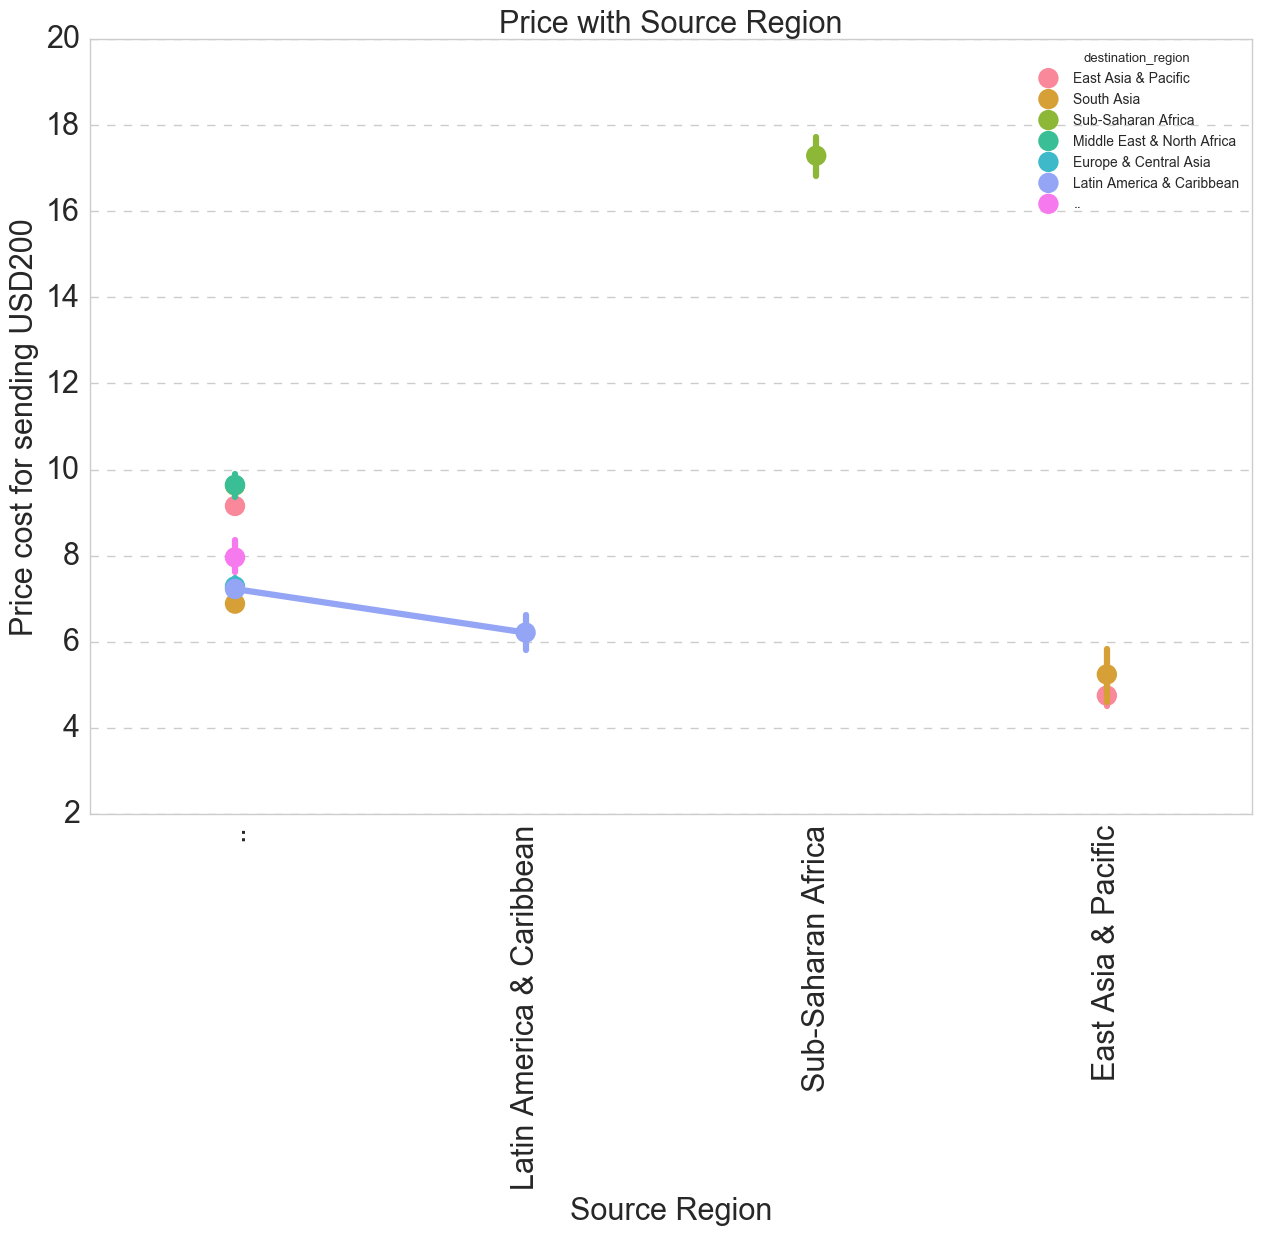

In [276]:
fig = plt.figure(figsize=(15, 10))
sns.set_style("whitegrid", {
    'grid.linestyle': '--'
 })

ax1 = sns.pointplot(x="source_region", y="cc1 total cost %", hue = 'destination_region', data=bank_df)
#ax1 = sns.pointplot(x="source_name", y="cc1 total cost %", hue='speed actual', data=bank_df)
#locs, labels = plt.xticks()
plt.xticks(rotation = 90, fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Source Region', fontsize=22)
plt.ylabel('Price cost for sending USD200', fontsize=22)
plt.title('Price with Source Region', fontsize=22)

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.set_style("whitegrid", {
    'grid.linestyle': '--'
 })

ax1 = sns.pointplot(x="source_name", y="cc1 total cost %", hue='source_income', data=bank_df)
#ax1 = sns.pointplot(x="source_name", y="cc1 total cost %", hue='speed actual', data=bank_df)
#locs, labels = plt.xticks()
plt.xticks(rotation = 90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Source Country', fontsize=16)
plt.ylabel('Price cost for sending USD200', fontsize=16)
plt.title('Source Country')
fig.savefig('/Users/yingqinluo/Desktop/Data Scientist/FXCompared/price_trends with corridor.jpg')

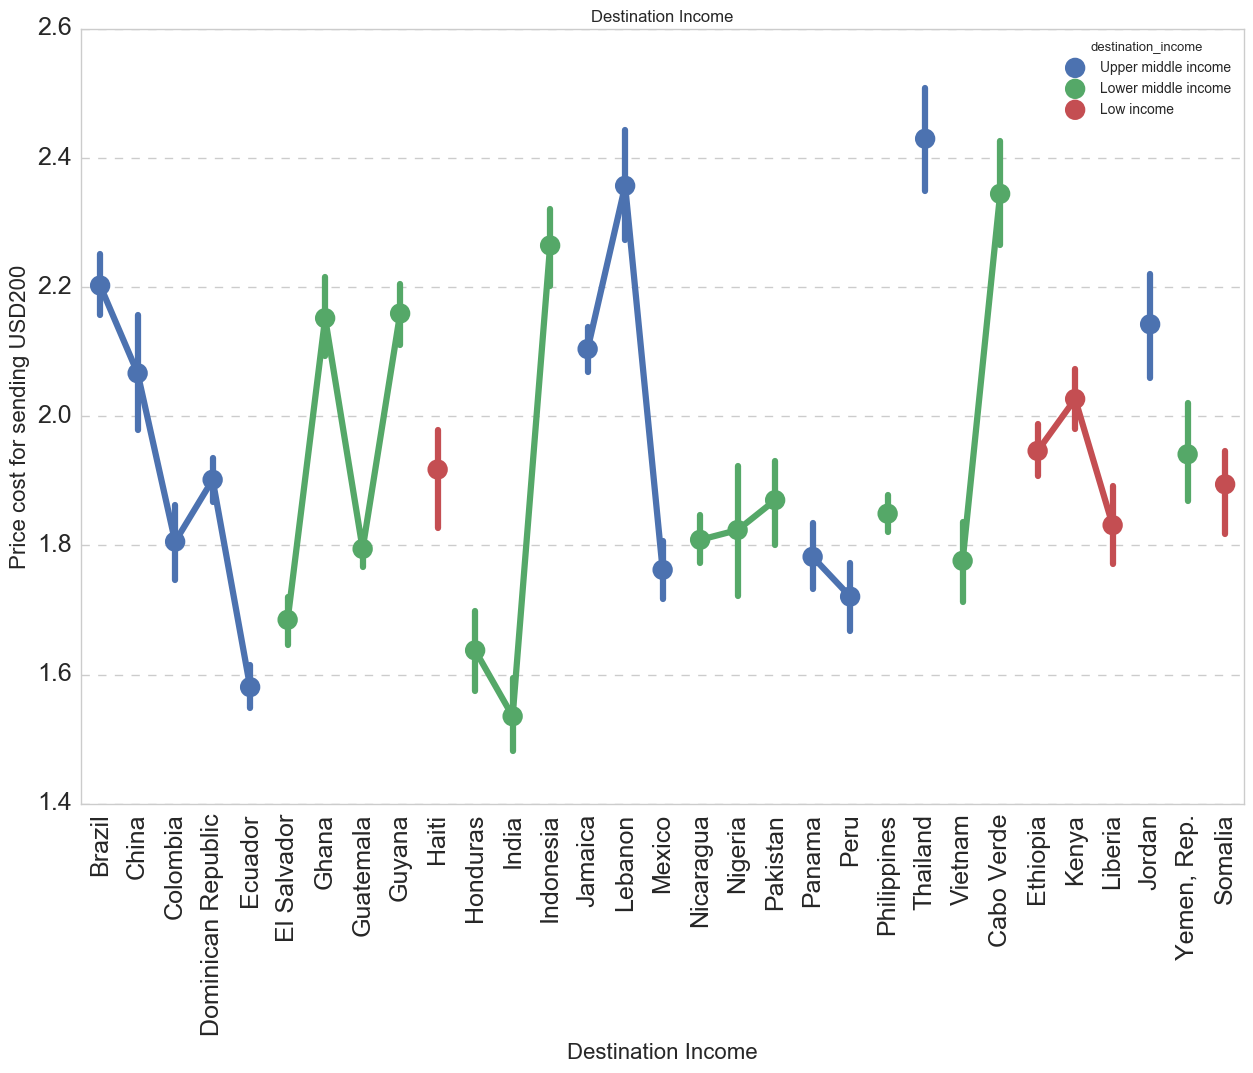

In [198]:
# trends about the cost between destination name and destination income
fig = plt.figure(figsize=(15, 10))
sns.set_style("whitegrid", {
    'grid.linestyle': '--'
 })

ax1 = sns.pointplot(x="destination_name", y="cc1 total cost %", hue='destination_income',
                    data=bank_df[bank_df['source_name']=='United States'])
#ax1 = sns.pointplot(x="source_name", y="cc1 total cost %", hue='speed actual', data=bank_df)
#locs, labels = plt.xticks()
plt.xticks(rotation = 90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Destination Income', fontsize=16)
plt.ylabel('Price cost for sending USD200', fontsize=16)
plt.title('Destination Income')
fig.savefig('/Users/yingqinluo/Desktop/Data Scientist/FXCompared/price_trends with destination name and income.jpg')

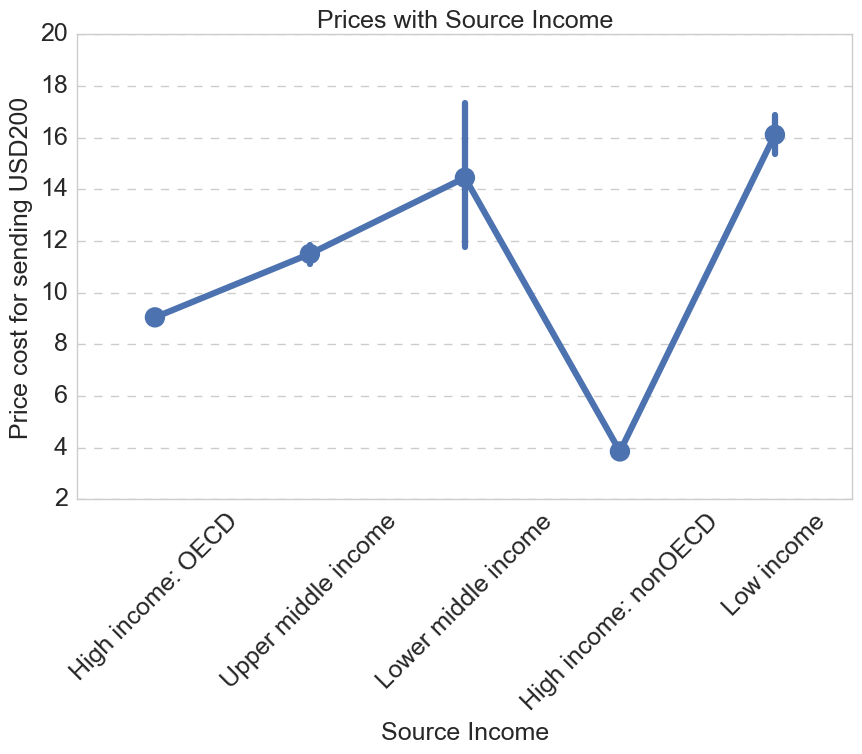

In [273]:
# trends about the cost between source_income and destination income
fig = plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {
    'grid.linestyle': '--'
 })

ax1 = sns.pointplot(x="source_income", y="cc1 total cost %",# hue='source_income',
                    data=bank_df)
#ax1 = sns.pointplot(x="source_name", y="cc1 total cost %", hue='speed actual', data=bank_df)
#locs, labels = plt.xticks()
plt.xticks(rotation = 45, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Source Income', fontsize=18)
plt.ylabel('Price cost for sending USD200', fontsize=18)
plt.title('Prices with Source Income', fontsize=18)
#fig.savefig('/Users/yingqinluo/Desktop/Data Scientist/FXCompared/price_trends with source income and destination income.jpg')

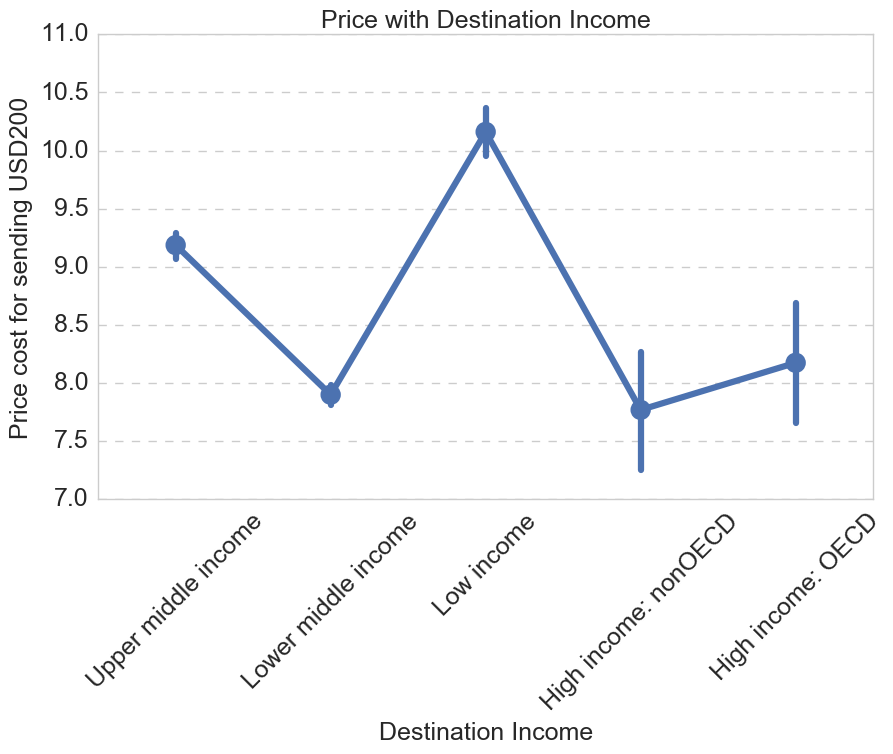

In [274]:
fig = plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {
    'grid.linestyle': '--'
 })

ax1 = sns.pointplot(x="destination_income", y="cc1 total cost %", data=bank_df)
#ax1 = sns.pointplot(x="source_name", y="cc1 total cost %", hue='speed actual', data=bank_df)
#locs, labels = plt.xticks()
plt.xticks(rotation = 45, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Destination Income', fontsize=18)
plt.ylabel('Price cost for sending USD200', fontsize=18)
plt.title('Price with Destination Income', fontsize=18)
#fig.savefig('/Users/yingqinluo/Desktop/Data Scientist/FXCompared/price_trends with destination income.jpg')

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 <a list of 10 Text yticklabel objects>)

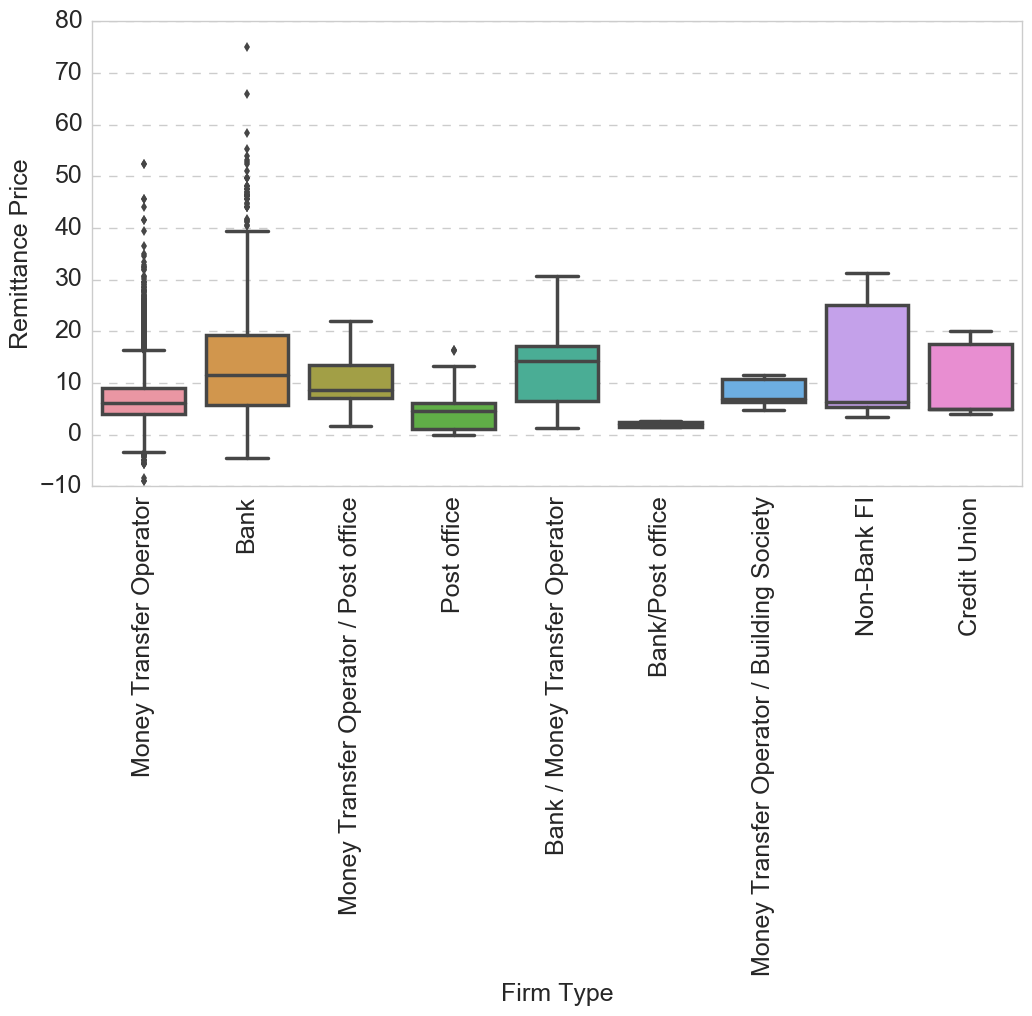

In [264]:
ax = sns.boxplot(x="firm_type", y="cc1 total cost %", 
                  data=bank_df, linewidth=2.5)
plt.xlabel('Firm Type', fontsize=18)
plt.ylabel('Remittance Price', fontsize=18)
plt.xticks(rotation = 90, fontsize=18)
plt.yticks(fontsize=18)

In [187]:
bank_df[bank_df['source_name']=='Germany']

array([u'High income: OECD'], dtype=object)

In [39]:
bank_df['corridor'].value_counts()

Australia -> Philippines               737
Singapore -> Philippines               499
United States -> Philippines           487
United States -> Dominican Republic    468
Japan -> Philippines                   419
Japan -> China                         418
United Kingdom -> Philippines          405
Australia -> India                     393
United Kingdom -> Poland               361
Japan -> Brazil                        343
Italy -> Philippines                   318
Canada -> Philippines                  318
New Zealand -> Samoa                   317
Korea, Rep. -> Vietnam                 316
United States -> Brazil                309
Germany -> Turkey                      307
United Kingdom -> India                304
Japan -> India                         304
United States -> Colombia              295
Australia -> Vietnam                   294
New Zealand -> Tonga                   293
France -> Morocco                      287
Italy -> Romania                       282
New Zealand

In [142]:
bank_df['product'].value_counts()

Cash to cash                              15596
Account to account                         7883
Online service                             5946
Cash to account                            2512
Door to door                               1050
Account to cash                            1044
Cash to cash,Credit/debit card service      996
Account to account (other bank)             987
Account to account (same bank)              925
Prepaid card                                685
Account,Cash to cash                        565
Credit/debit card service                   406
Mobile                                      266
Account,Card,Cash to cash                   243
Cash to account (same bank)                 194
USD service                                  89
Account,Account to cash                      74
Cash,Cash to account                         51
EUR service                                  32
Card,Cash to cash                            21
Account,Cash to account                 

In [5]:
bank_df['product'].freq

AttributeError: 'Series' object has no attribute 'freq'

In [222]:
products = bank_df['product'].value_counts()
products = products[products>50].index
products

Index([u'Cash to cash', u'Account to account', u'Online service',
       u'Cash to account', u'Door to door', u'Account to cash',
       u'Cash to cash,Credit/debit card service',
       u'Account to account (other bank)', u'Account to account (same bank)',
       u'Prepaid card', u'Account,Cash to cash', u'Credit/debit card service',
       u'Mobile', u'Account,Card,Cash to cash', u'Cash to account (same bank)',
       u'USD service', u'Account,Account to cash', u'Cash,Cash to account'],
      dtype='object')

In [223]:
sig_product = bank_df.loc[bank_df['product'].isin(products)]


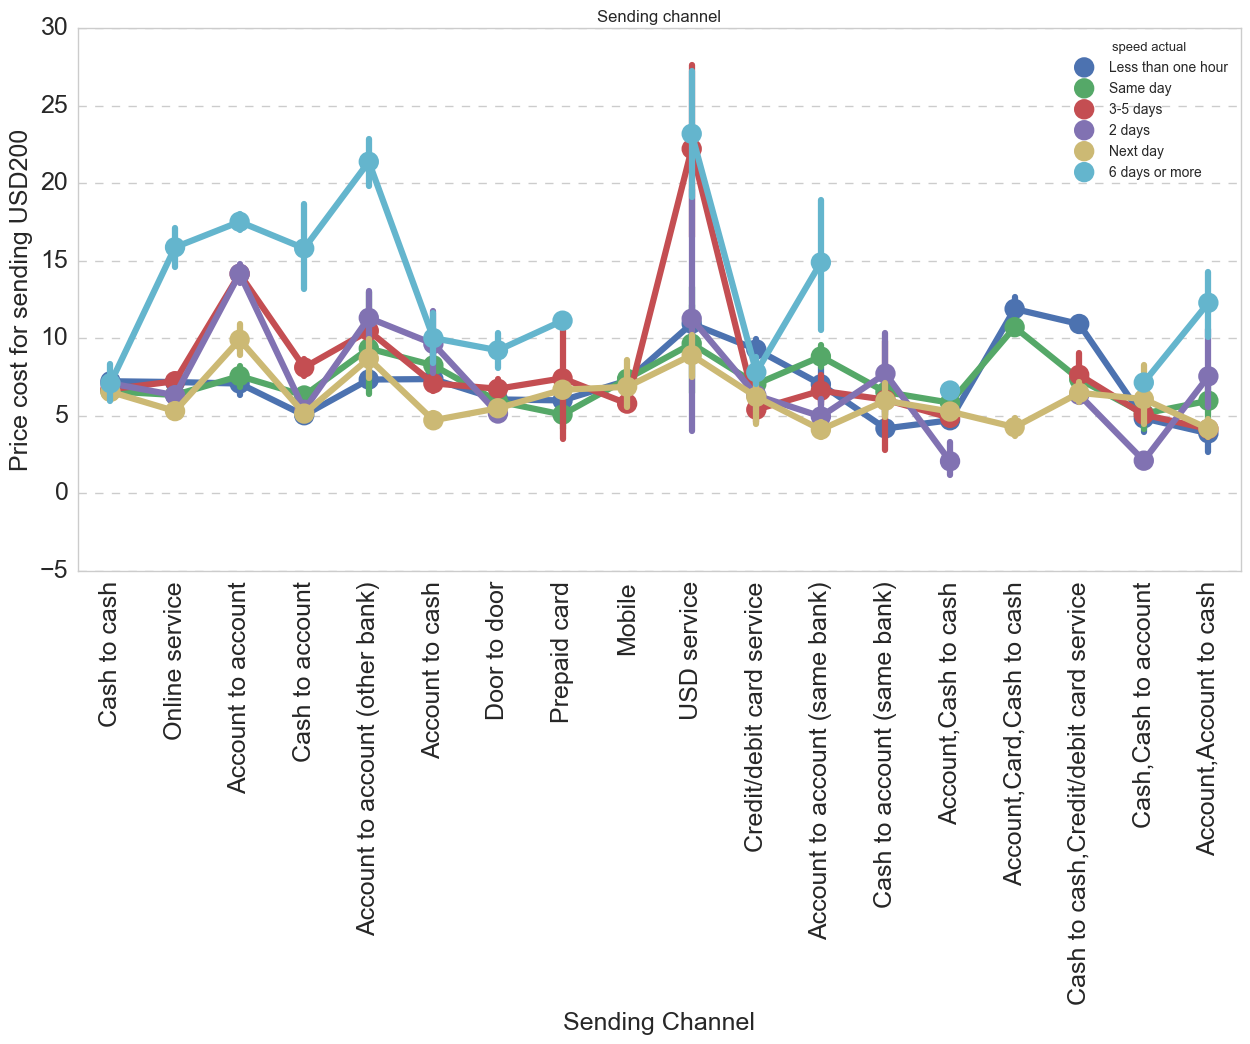

In [230]:
fig = plt.figure(figsize=(15, 7))
sns.set_style("whitegrid", {
    'grid.linestyle': '--'
 })

ax1 = sns.pointplot(x="product", y="cc1 total cost %", hue='speed actual', data=sig_product)
#locs, labels = plt.xticks()
plt.xticks(rotation = 90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Sending Channel', fontsize=18)
plt.ylabel('Price cost for sending USD200', fontsize=18)
plt.title('Sending channel')
fig.savefig('/Users/yingqinluo/Desktop/Data Scientist/FXCompared/price_trends with channel.jpg')

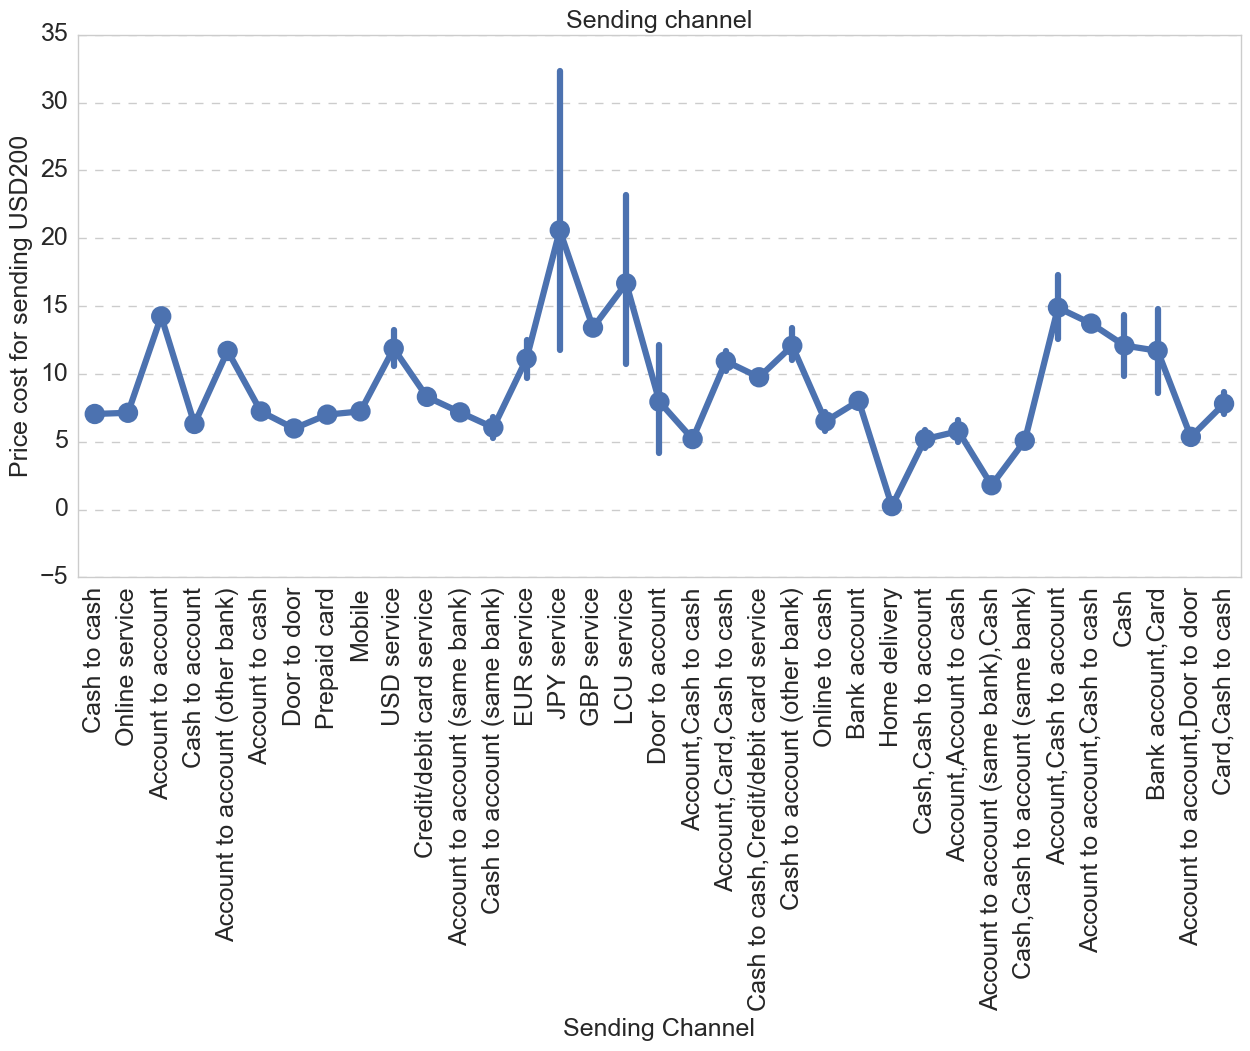

In [226]:
fig = plt.figure(figsize=(15, 7))
sns.set_style("whitegrid", {
    'grid.linestyle': '--'
 })

ax = sns.pointplot(x="product", y="cc1 total cost %", data=bank_df)

#locs, labels = plt.xticks()
plt.xticks(rotation = 90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Sending Channel', fontsize=18)
plt.ylabel('Price cost for sending USD200', fontsize=18)
plt.title('Sending channel', fontsize=18)
fig.savefig('/Users/yingqinluo/Desktop/Data Scientist/FXCompared/price_trends with channel 2.jpg')

In [228]:
sig_product.head()

,id,period,source_code,source_name,source_region,source_income,source_lending,source_G8G20,destination_code,destination_name,...,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,note1,note2,coverage,pick-up method,date
0,13123,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.770000,3.29,5.29,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
1,13129,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.767737,3.42,5.82,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
2,13128,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.750000,4.38,7.38,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
3,13127,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.791400,2.12,6.12,1.83024,yes,NaN,NaN,Nationwide,Bank Account,24/Jan/2011
4,13135,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.764200,3.61,7.61,1.83024,yes,NaN,NaN,Nationwide,Bank Account,24/Jan/2011


In [182]:
bank_df[bank_df['product']=='Home delivery']

,period,source_code,source_name,source_region,source_income,source_lending,source_G8G20,destination_code,destination_name,destination_region,...,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,coverage,pick-up method,date,corridor
id,,,,,,,,,,,,,,,,,,,,,
11687,2013_2Q,USA,United States,..,High income: OECD,..,G8/G20,SLV,El Salvador,Latin America & Caribbean,...,0.000000,0.693147,0.0,0.000000,0.693147,yes,Nationwide,Cash,13/May/2013,United States -> El Salvador
11683,2013_2Q,USA,United States,..,High income: OECD,..,G8/G20,SLV,El Salvador,Latin America & Caribbean,...,0.693147,0.693147,0.0,0.182322,0.693147,yes,Nationwide,Cash,13/May/2013,United States -> El Salvador


In [ ]:
pd.crosstab(dframe.Animal,dframe.Intelligence,margins=True)

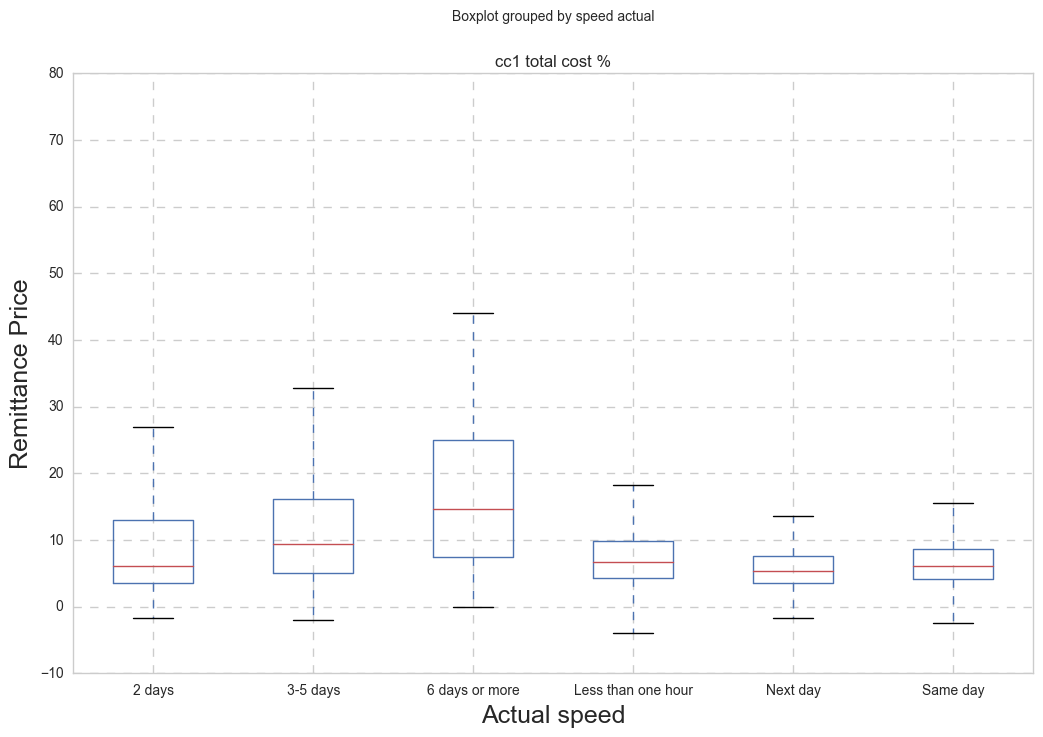

In [245]:
bank_df.boxplot('cc1 total cost %', by='speed actual', figsize=(12, 8))
plt.xlabel('Actual speed', fontsize=18)
plt.ylabel('Remittance Price', fontsize=18)

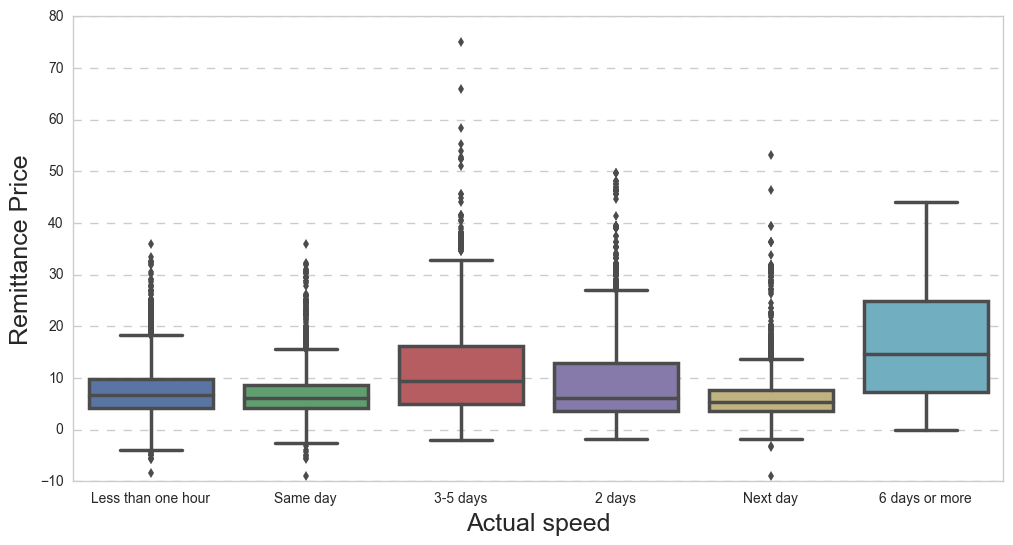

In [246]:
ax = sns.boxplot(x="speed actual", y="cc1 total cost %", 
                  data=bank_df, linewidth=2.5)
plt.xlabel('Actual speed', fontsize=18)
plt.ylabel('Remittance Price', fontsize=18)

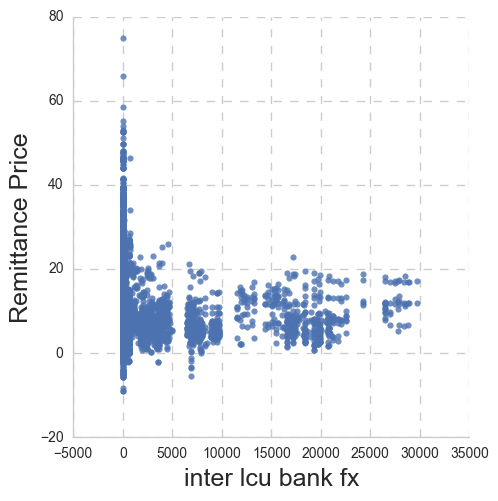

In [252]:
sns.lmplot("inter lcu bank fx", "cc1 total cost %",
           data=bank_df,
           fit_reg=False,
           
           )

plt.xlabel('inter lcu bank fx', fontsize=18)
plt.ylabel('Remittance Price', fontsize=18)

In [239]:
bank_df['speed actual'].unique()

array([u'Less than one hour', u'Same day', u'3-5 days', u'2 days',
       u'Next day', u'6 days or more', nan], dtype=object)

# 2. Which variables contain the most information with respect to remittance prices.

In [2]:
# this is put in the separate file.
# please refer to FXCompared Assessment 3